In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

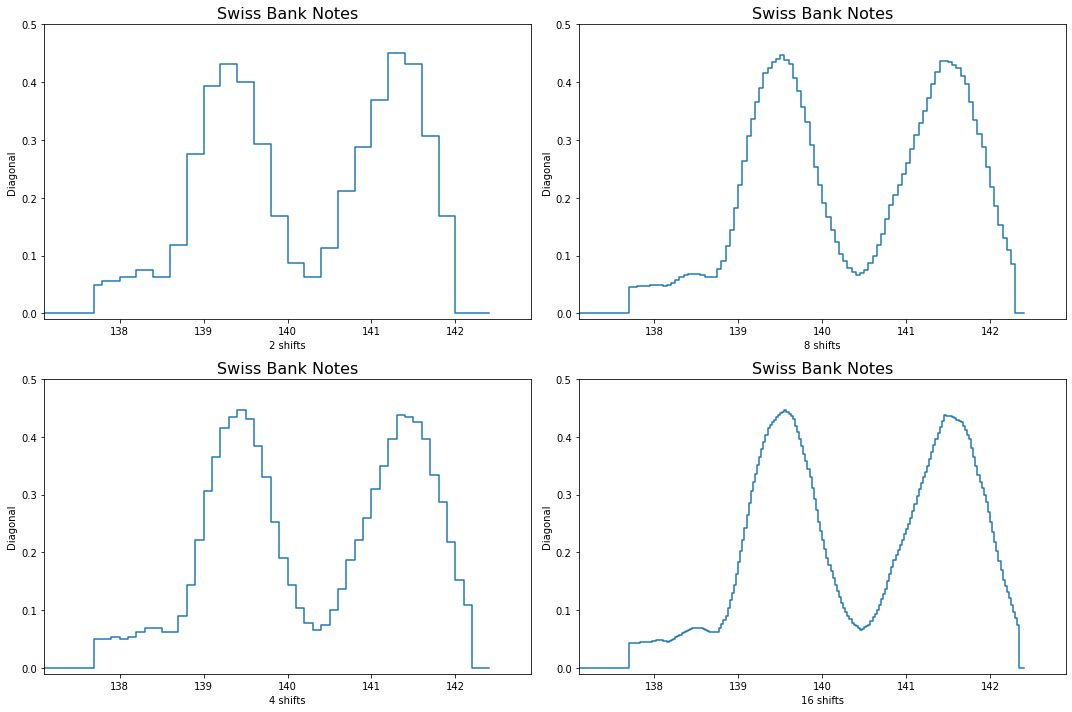

In [2]:
x = pd.read_csv("bank2.dat", sep = "\s+", header=None)
x = x.iloc[:, 5]

n = len(x)
step = [2, 8, 4, 16]

h = 0.4
t0 = h * (np.floor(min(x)/h) + 0.5)  # Min
tf = h * (np.floor(max(x)/h) - 0.5)  # Max

fig, axes = plt.subplots(2,2, figsize = (15, 10))
for l in range(4):
    m = step[l]
    delta = h/m
    
    nbin = np.floor((max(x) - min(x))/delta)
    if l == 0 or l == 2: 
        binedge = [np.round(c, 1) for c in np.arange(min(x), max(x)+(delta*0.9), delta)]
    else:
        binedge = [c for c in np.arange(min(x), max(x)+(delta*0.9), delta)]
    binedge = [min(x)-0.01 if c == min(x) else c for c in binedge]
    
    vk = [0]*(len(binedge) - 1)
    for i in range(len(binedge) - 1):
        for point in x:
            if (point > binedge[i]) and (point <= binedge[i+1]):
                vk[i] += 1
                
    fhat = [0]*(m-1) + list(vk) + [0]*(m-1)
    
    ind = range(1 - m, m)
    den = sum([(1 - np.abs(c/m)) for c in ind])
    wm = [(m *(1 - np.abs(c/m))/den) for c in ind]
    
    fhatk = [0] * int(nbin)
    
    for k in range(int(nbin)):
        ind = range(k, (2 * m + k - 1))
        fhatk[k] = sum([(wm[a] * fhat[c]) for a, c in zip(range(len(wm)), ind)])
            
    fhatk = [c/(n * h) for c in fhatk]
    binedge = np.insert(binedge, 0, 0)
    binedge = np.insert(binedge, 1, 137.7)
    binedge = [137.8 if x==137.79 else x for x in binedge]
        
    fhatk = [0]*2 + fhatk + [0]*2
    
    axes.reshape(-1)[l].step(binedge, fhatk)
    axes.reshape(-1)[l].set_ylim(-0.01, 0.5)
    axes.reshape(-1)[l].set_xlim(137.1, 142.9)
    axes.reshape(-1)[l].set_xlabel("{} shifts".format(m))
    axes.reshape(-1)[l].set_ylabel("Diagonal")
    axes.reshape(-1)[l].set_title("Swiss Bank Notes", fontsize = 16)
    
fig.tight_layout()   
plt.show()